## Assignment : 14

<pre>
1. Preprocess all the Data we have in DonorsChoose <a href='https://drive.google.com/drive/folders/1MIwK7BQMev8f5CbDDVNLPaFGB32pFN60'>Dataset</a> use train.csv
2. Combine 4 essay's into one column named - 'preprocessed_essays'. 
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a href='https://datascience.stackexchange.com/a/20192'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum, resources: <a href='http://cs231n.github.io/neural-networks-3/'>cs231n class notes</a>, <a href='https://www.youtube.com/watch?v=hd_KFJ5ktUc'>cs231n class video</a>. 
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in .ipynb notebook and PDF. 
8. Use Categorical Cross Entropy as Loss to minimize.
</pre>

In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder , StandardScaler , OneHotEncoder
from sklearn.metrics import roc_auc_score


import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input , Dropout,Flatten,concatenate,LSTM ,Embedding, Conv1D, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping , TensorBoard
#https://stackoverflow.com/questions/52357542/attributeerror-tensor-object-has-no-attribute-numpy
#tf.config.run_functions_eagerly(True)


import datetime, os
%load_ext tensorboard

### Some Preprocessing
    1.Load Word Embedding
    2.Load dataset and segregate dependent and independent fetures

In [2]:
data = pd.read_csv('preprocessed_data.csv')

Y = data['project_is_approved'].values
X = data.drop(['project_is_approved'],axis = 1)
# 70-30 split of data with stratification
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)





In [3]:
data = pd.read_csv('preprocessed_data.csv')

In [4]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [5]:
#Segregating Dependent and Independent features

Y = data['project_is_approved'].values
X = data.drop(['project_is_approved'],axis = 1)

In [6]:
# 70-30 split of data with stratification
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)


In [7]:
#Check dimensions of Train and test data
print(X_train.shape[0] == y_train.shape[0])
print(X_test.shape[0] == y_test.shape[0])

True
True


### Model-1

Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



- For LSTM, you can choose your sequence padding methods on your own or you can train your LSTM without padding, there is no restriction on that.

Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

### https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work

input_layer = Input(shape=(n,))

embedding = Embedding(no_1, no_2, input_length=n)(input_layer)

flatten = Flatten()(embedding)

#### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
####  2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

### Preprocessing Essay feature  

#### Step 1 - Fit text tokenizer on essay feature of train dataset

In [8]:
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
#https://machinelearningmastery.com/prepare-text-data-deep-learning-keras/
    
#Train tokenizer on Train data only
t  = Tokenizer()
t.fit_on_texts(X_train['essay'])

In [9]:
X_train['essay_tokens'] = t.texts_to_sequences(np.asarray(X_train['essay']))
X_test['essay_tokens'] = t.texts_to_sequences(np.asarray(X_test['essay']))

/home/chitresh/miniconda3/envs/new_env/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/chitresh/miniconda3/envs/new_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [10]:
X_test.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price,essay_tokens
103211,tx,teacher,grades_prek_2,2,literacy_language,esl literacy,i teach title i low income school the percenta...,117.04,"[2, 49, 112, 2, 91, 134, 3, 7, 1336, 846, 915,..."
25113,wa,ms,grades_prek_2,1,literacy_language,literature_writing,i diverse group students classroom my students...,208.07,"[2, 105, 61, 1, 6, 4, 1, 1068, 91, 134, 118, 5..."
106946,ga,mrs,grades_3_5,15,literacy_language,literacy literature_writing,my students imaginative creative eager third g...,313.75,"[4, 1, 2141, 143, 94, 358, 122, 271, 21, 31, 2..."


#### Step2 Make length of this feature equal to 300 as of our word vectors

In [11]:
len_embeddings = 300
X_train_essay = pad_sequences(X_train['essay_tokens'].values, maxlen=len_embeddings)
X_test_essay  = pad_sequences(X_test['essay_tokens'].values, maxlen=len_embeddings)

#### Step 4 Get the embedding matrix as is required in Embedding layer.

In [12]:
#Take only those word vectors which are present in our training data

#print(type(t.word_index)) - dictionary
with open('glove_vectors','rb') as f:
    embeddings = pickle.load(f)
    
max_words = len(t.word_index)+1
embeddings_mat = np.zeros((max_words,len_embeddings))

for word, i in t.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embeddings_mat[i] = embedding_vector

In [13]:
print(embeddings_mat[200])

[-4.3513e-01  4.0743e-01  2.2165e-01 -6.0927e-01 -2.7424e-01 -2.3149e-01
 -3.2341e+00  3.0772e-01 -1.7940e-02 -7.4481e-01  1.6566e-01  4.1989e-02
 -1.5045e-01 -4.4603e-01 -1.7743e-01 -1.7807e-01  1.9957e-01  9.8679e-02
 -9.4911e-01  1.9601e-01  5.3195e-01  5.4851e-01  3.5127e-01  3.5170e-01
  2.1292e-02 -5.0950e-01  4.7914e-01  2.5772e-01  4.5941e-01 -7.0546e-02
  1.5776e-01  1.5541e-01  4.0705e-01 -4.7664e-01 -2.2956e-01  5.7266e-01
  1.2679e-01  1.5115e-01  2.6836e-01  5.8877e-03  2.4412e-01  1.8188e-01
 -3.4022e-02  3.3863e-01 -1.7361e-01  5.6732e-01 -1.6217e-01 -5.1171e-01
 -3.4799e-01  4.3382e-01  1.2042e-02 -3.0455e-01 -6.1643e-01  4.6887e-01
  7.4270e-01 -4.5566e-01 -7.1125e-03 -1.5474e-01  4.7934e-01  4.1385e-01
  3.6900e-02  3.1015e-02  2.4902e-01 -4.5375e-01 -2.7680e-01  7.4268e-02
  3.0333e-01  2.7293e-01  1.3760e-01  4.5720e-01 -1.6398e-01  1.2128e-01
 -9.4683e-01  1.4540e-01  5.0068e-01  6.5366e-03 -2.5565e-01  2.4079e-01
  9.5816e-02 -1.4168e-01  2.7307e-02  1.8647e-01 -1

### Categorical Features:
    1. school_state
    2. teacher_prefix
    3. clean_categories
    4. clean_subcategories
### Convert these to nunmeric data using Label Encoder


In [28]:
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html
# Each input has a embedding layer so we need input and output dimensions 
def categorical_encoding(X,feature):
    encoder = LabelEncoder()
    encoder.fit(X[feature].values)
    
    return encoder

In [29]:
# https://medium.com/@satnalikamayank12/on-learning-embeddings-for-categorical-data-using-keras-165ff2773fc9
def len_embedding(X):
    l = min(np.ceil(len(np.unique(X))/2),50)
    return int(l)

In [30]:
encoder = categorical_encoding(X,'school_state')

X_train_school_state = encoder.transform(X_train['school_state'].values)
X_test_school_state = encoder.transform(X_test['school_state'].values)

embedding_school_state_len = len_embedding(X_train_school_state)

print("Length of {} embedding is:{}".format('school_state',embedding_school_state_len))

embedding_school_state_unique_values = X_train['school_state'].nunique()
print(embedding_school_state_unique_values)


Length of school_state embedding is:26
51


In [31]:
encoder = categorical_encoding(X,'teacher_prefix')

X_train_teacher_prefix = encoder.transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix = encoder.transform(X_test['teacher_prefix'].values)

embedding_teacher_prefix_len = len_embedding(X_train_teacher_prefix)

print("Length of {} embedding is:{}".format('teacher_prefix',embedding_teacher_prefix_len))
embedding_teacher_prefix_unique_value = X_train['teacher_prefix'].nunique()
print(embedding_teacher_prefix_unique_value)
print(type(X_train_teacher_prefix))

Length of teacher_prefix embedding is:3
5
<class 'numpy.ndarray'>


In [32]:
encoder = categorical_encoding(X,'clean_categories')

X_train_clean_categories = encoder.transform(X_train['clean_categories'].values)
X_test_clean_categories = encoder.transform(X_test['clean_categories'].values)

embedding_clean_categories_len = len_embedding(X_train_clean_categories)

print("Length of {} embedding is:{}".format('clean_categories',embedding_clean_categories_len))
embedding_clean_categories_unique_value = X_train['clean_categories'].nunique()
print(embedding_clean_categories_unique_value)


Length of clean_categories embedding is:25
50


In [33]:
encoder = categorical_encoding(X,'clean_subcategories')

X_train_clean_subcategories = encoder.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories = encoder.transform(X_test['clean_subcategories'].values)

embedding_clean_subcategories_len = len_embedding(X_train_clean_subcategories)

print("Length of {} embedding is:{}".format('clean_subcategories',embedding_clean_subcategories_len))
embedding_clean_subcategories_unique_value = X_train['clean_subcategories'].nunique()
print(embedding_clean_subcategories_unique_value)


Length of clean_subcategories embedding is:50
395


In [34]:
encoder = categorical_encoding(X,'project_grade_category')

X_train_project_grade_category = encoder.transform(X_train['project_grade_category'].values)
X_test_project_grade_category = encoder.transform(X_test['project_grade_category'].values)

embedding_project_grade_category_len = len_embedding(X_train_project_grade_category)

print("Length of {} embedding is:{}".format('project_grade_category',embedding_project_grade_category_len))
embedding_project_grade_category_unique_value = X_train['project_grade_category'].nunique()
print(embedding_project_grade_category_unique_value)


Length of project_grade_category embedding is:2
4


### Numerical features
    1. teacher_number_of_previously_posted_projects
    2. price
####  Normalization

In [35]:
def normalization(X):
    s = StandardScaler()
    s.fit(X)
    return s


In [36]:
# StandardScaler expects 2d array
X_train_teacher_number_of_previously_posted_projects = X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)

s = normalization(X_train_teacher_number_of_previously_posted_projects)

X_train_teacher_number_of_previously_posted_projects = s.transform(X_train_teacher_number_of_previously_posted_projects)

X_test_teacher_number_of_previously_posted_projects = X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects = s.transform(X_test_teacher_number_of_previously_posted_projects)

In [37]:
# StandardScaler expects 2d array
X_train_price = X_train['price'].values.reshape(-1,1)

s = normalization(X_train_price)

X_train_price = s.transform(X_train_price)

X_test_price = X_test['price'].values.reshape(-1,1)
X_test_price = s.transform(X_test_price)

In [38]:
X_train_num_features = np.concatenate([X_train_teacher_number_of_previously_posted_projects,X_train_price],axis=1) 
X_test_num_features = np.concatenate([X_test_teacher_number_of_previously_posted_projects,X_test_price],axis=1)

#### Create Model

The Embedding layer is defined as the first hidden layer of a network. It must specify 3 arguments:

It must specify 3 arguments:

input_dim: This is the size of the vocabulary in the text data. For example, if your data is integer encoded to values between 0-10, then the size of the vocabulary would be 11 words.

output_dim: This is the size of the vector space in which words will be embedded. It defines the size of the output vectors from this layer for each word. For example, it could be 32 or 100 or even larger. Test different values for your problem.

input_length: This is the length of input sequences, as you would define for any input layer of a Keras model. For example, if all of your input documents are comprised of 1000 words, this would be 1000.

In [25]:
#Multiple runnings of same model will be required 


# Input 1 , essay_input layer

essay_input = Input(shape=(300,), name='essay_input')

embedding_essay = Embedding(input_dim = max_words,output_dim = 300,
                            input_length=300 , weights=[embeddings_mat])(essay_input)


reg = l2(0.001)

#100 cell LSTM unit
lstm_essay = LSTM(100,recurrent_dropout=0.5,kernel_regularizer=reg,return_sequences=True)(embedding_essay)

flatten_essay = Flatten()(lstm_essay)

#https://stackoverflow.com/questions/66873192/subclassing-a-keras-layer-the-following-variables-were-used-a-lambda-layers-ca

In [26]:
# Input 2 , school_state feature

school_state_input = Input(shape=(1,), name='school_state_input')

embedding_school_state = Embedding(input_dim=embedding_school_state_unique_values+1,
                                   output_dim=embedding_school_state_len , input_length=1)(school_state_input)

flatten_school_state = Flatten()(embedding_school_state)



In [27]:
teacher_prefix_input = Input(shape=(1,), name='teacher_prefix_input')

embedding_teacher_prefix = Embedding(input_dim=embedding_teacher_prefix_unique_value+1,
                                     output_dim=embedding_teacher_prefix_len ,input_length=1)(teacher_prefix_input)

flatten_teacher_prefix = Flatten()(embedding_teacher_prefix)




In [28]:
clean_categories_input = Input(shape=(1,), name='clean_categories_input')

embedding_clean_categories = Embedding(input_dim=embedding_clean_categories_unique_value+1,
                                       output_dim=embedding_clean_categories_len, input_length=1)(clean_categories_input)

flatten_clean_categories = Flatten()(embedding_clean_categories)


In [29]:
clean_subcategories_input = Input(shape=(1,), name='clean_subcategories_input')

embedding_clean_subcategories = Embedding(input_dim=401,
                                          output_dim=embedding_clean_subcategories_len, input_length=1)(clean_subcategories_input)

flatten__clean_subcategories = Flatten()(embedding_clean_subcategories)



In [30]:
project_grade_category_input = Input(shape=(1,), name='project_grade_category_input')

embedding_project_grade_category = Embedding(input_dim=embedding_project_grade_category_unique_value+1,
                                     output_dim=embedding_project_grade_category_len,input_length=1)(project_grade_category_input)

flatten_project_grade_category = Flatten()(embedding_project_grade_category)


In [31]:

numeric_features_input = Input(shape=(2,) , name="numerical_features_input")
numeric_features_dense_layer = Dense(128, activation='relu' , kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(numeric_features_input )


### Model 1

In [32]:
flatten_layers = [flatten_essay, flatten_school_state,flatten_teacher_prefix,flatten_clean_categories,
                  flatten__clean_subcategories,flatten_project_grade_category,numeric_features_dense_layer]

concat_layer = concatenate(flatten_layers)

model = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=l2(0.001))(concat_layer)
model = Dropout(0.5)(model)
model = Dense(200,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model)
model = BatchNormalization()(model)
model = Dropout(0.5)(model)
model = Dense(80,activation="relu", kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model)


output = Dense(2, activation='softmax', name='output_layer')(model)


model1 = Model(inputs=[essay_input, school_state_input ,teacher_prefix_input,clean_categories_input,
                       clean_subcategories_input ,project_grade_category_input ,numeric_features_input],outputs=[output])


In [33]:
model1.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 300)     15536100    essay_input[0][0]                
__________________________________________________________________________________________________
school_state_input (InputLayer) [(None, 1)]          0                                            
__________________________________________________________________________________________________
teacher_prefix_input (InputLaye [(None, 1)]          0                                            
______________________________________________________________________________________________

In [35]:
def helper(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)
    
def custom_auroc(y_true, y_pred):
    return tf.py_function(helper, (y_true, y_pred), tf.double)

In [36]:
#need to define a custome function for calculating auroc

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[custom_auroc])

In [37]:
# final X_train and X_test 
X_Train_consolidated = [X_train_essay,X_train_school_state,X_train_teacher_prefix,
                        X_train_clean_categories,X_train_clean_subcategories,
                        X_train_project_grade_category,X_train_num_features]



X_Test_consolidated = [X_test_essay,X_test_school_state,X_test_teacher_prefix,
                       X_test_clean_categories,X_test_clean_subcategories,
                       X_test_project_grade_category,X_test_num_features]




In [38]:
X_train_essay.shape

(87398, 300)

### Don't run again 

In [39]:
#https://keras.io/api/utils/python_utils/#to_categorical-function
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 2) 
y_test = to_categorical(y_test, 2)
print(y_train.shape)

(87398, 2)


In [40]:
#https://www.gitmemory.com/issue/tensorflow/tensorflow/28799/532818343


checkpoint_object = ModelCheckpoint('model1.h5',monitor="val_custom_auroc",mode="max",save_best_only = True,verbose=2)


earlystop_object = EarlyStopping(monitor = 'val_custom_auroc', mode="max",patience = 4,verbose = 2)

logdir = os.path.join("logs", 'model1_visualization')

tensorboard_object = TensorBoard(log_dir=logdir,histogram_freq=1)

callbacks = [checkpoint_object,earlystop_object, tensorboard_object]

In [41]:
history = model1.fit(X_Train_consolidated, y_train, 
                     batch_size=256, epochs=10, verbose=1,
                     callbacks=callbacks, validation_data=(X_Test_consolidated,y_test))

Train on 87398 samples, validate on 21850 samples
Epoch 1/10
87296/87398 [============================>.] - ETA: 0s - loss: 1.2881 - custom_auroc: 0.5843
Epoch 00001: val_custom_auroc improved from -inf to 0.72132, saving model to model1.h5
87398/87398 [==============================] - 326s 4ms/sample - loss: 1.2875 - custom_auroc: 0.5845 - val_loss: 0.9043 - val_custom_auroc: 0.7213
Epoch 2/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.7137 - custom_auroc: 0.7178
Epoch 00002: val_custom_auroc improved from 0.72132 to 0.74838, saving model to model1.h5
87398/87398 [==============================] - 334s 4ms/sample - loss: 0.7136 - custom_auroc: 0.7180 - val_loss: 0.6369 - val_custom_auroc: 0.7484
Epoch 3/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.5644 - custom_auroc: 0.7618
Epoch 00003: val_custom_auroc improved from 0.74838 to 0.75185, saving model to model1.h5
87398/87398 [==============================] - 336s 4ms/sample - loss: 0.5642

In [42]:
Ass_1_model1 = np.max(model1.history.history['val_custom_auroc'])
print(Ass_1_model1)

0.75184745


In [43]:
%tensorboard --logdir {logdir}

### Model 1.2

In [44]:
model1_2 = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=l2(0.0001))(concat_layer)
model1_2 = Dropout(0.2)(model1_2)
model1_2 = Dense(200,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.0001))(model1_2)
model1_2 = BatchNormalization()(model1_2)
model1_2 = Dropout(0.5)(model1_2)
model1_2 = Dense(80,activation="relu", kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.0001))(model1_2)


output = Dense(2, activation='softmax', name='output_layer')(model1_2)


model1_2 = Model(inputs=[essay_input, school_state_input ,teacher_prefix_input,clean_categories_input,
                       clean_subcategories_input ,project_grade_category_input ,numeric_features_input],outputs=[output])


In [45]:
model1_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=[custom_auroc])

In [46]:
checkpoint_object = ModelCheckpoint('model2.h5',monitor="val_custom_auroc",mode="max",save_best_only = True,verbose=2)


earlystop_object = EarlyStopping(monitor = 'val_custom_auroc', mode="max",patience = 4,verbose = 2)

logdir = os.path.join("logs", 'model1_2_visualization')

tensorboard_object = TensorBoard(log_dir=logdir,histogram_freq=1)

callbacks = [checkpoint_object,earlystop_object, tensorboard_object]

In [48]:
history = model1_2.fit(X_Train_consolidated, y_train, 
                     batch_size = 512, epochs=10, verbose=2,
                     callbacks=callbacks, validation_data=(X_Test_consolidated,y_test))

Train on 87398 samples, validate on 21850 samples
Epoch 1/10

Epoch 00001: val_custom_auroc improved from -inf to 0.63384, saving model to model2.h5
87398/87398 - 265s - loss: 0.3127 - custom_auroc: 0.9297 - val_loss: 0.6732 - val_custom_auroc: 0.6338
Epoch 2/10

Epoch 00002: val_custom_auroc improved from 0.63384 to 0.64420, saving model to model2.h5
87398/87398 - 265s - loss: 0.2738 - custom_auroc: 0.9402 - val_loss: 0.6685 - val_custom_auroc: 0.6442
Epoch 3/10

Epoch 00003: val_custom_auroc improved from 0.64420 to 0.65200, saving model to model2.h5
87398/87398 - 265s - loss: 0.2493 - custom_auroc: 0.9472 - val_loss: 0.6524 - val_custom_auroc: 0.6520
Epoch 4/10

Epoch 00004: val_custom_auroc did not improve from 0.65200
87398/87398 - 262s - loss: 0.2315 - custom_auroc: 0.9534 - val_loss: 0.6737 - val_custom_auroc: 0.6497
Epoch 5/10

Epoch 00005: val_custom_auroc did not improve from 0.65200
87398/87398 - 273s - loss: 0.2175 - custom_auroc: 0.9594 - val_loss: 0.7265 - val_custom_auro

In [49]:
%tensorboard --logdir {logdir}

In [50]:
Ass_1_model2 = np.max(model1_2.history.history['val_custom_auroc'])
print(Ass_1_model2)

0.6520036


### Model 1_3

### Try to minimize loss rather than maximizing area under curve

In [51]:
flatten_layers = [flatten_essay, flatten_school_state,flatten_teacher_prefix,flatten_clean_categories,
                  flatten__clean_subcategories,flatten_project_grade_category,numeric_features_dense_layer]

concat_layer = concatenate(flatten_layers)


model1_3 = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=l2(0.001))(concat_layer)
model1_3 = Dropout(0.2)(model1_3)
model1_3 = Dense(200,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model1_3)
model1_3 = BatchNormalization()(model1_3)
model1_3 = Dropout(0.5)(model1_3)
model1_3 = Dense(80,activation="sigmoid", kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model1_3)


output = Dense(2, activation='softmax', name='output_layer')(model1_3)


model1_3 = Model(inputs=[essay_input, school_state_input ,teacher_prefix_input,clean_categories_input,
                       clean_subcategories_input ,project_grade_category_input ,numeric_features_input],outputs=[output])


model1_3.compile(optimizer=Adam(0.05), loss='categorical_crossentropy', metrics=[custom_auroc])

checkpoint_object = ModelCheckpoint('model1_3.h5',monitor="val_loss",mode="min",save_best_only = True,verbose=2)


earlystop_object = EarlyStopping(monitor = 'val_loss', mode="min",patience = 4,verbose = 2)

logdir = os.path.join("logs", 'model1_3_visualization')
tensorboard_object = TensorBoard(log_dir=logdir,histogram_freq=1)

callbacks = [checkpoint_object,earlystop_object, tensorboard_object]


history = model1_3.fit(X_Train_consolidated, y_train, 
                     batch_size = 512, epochs=10, verbose=2,
                     callbacks=callbacks, validation_data=(X_Test_consolidated,y_test))

Train on 87398 samples, validate on 21850 samples
Epoch 1/10

Epoch 00001: val_loss improved from inf to 20.07366, saving model to model1_3.h5
87398/87398 - 279s - loss: 5.0974 - custom_auroc: 0.5400 - val_loss: 20.0737 - val_custom_auroc: 0.5763
Epoch 2/10

Epoch 00002: val_loss did not improve from 20.07366
87398/87398 - 270s - loss: 27.1702 - custom_auroc: 0.5348 - val_loss: 29.8800 - val_custom_auroc: 0.5657
Epoch 3/10

Epoch 00003: val_loss did not improve from 20.07366
87398/87398 - 279s - loss: 25.9079 - custom_auroc: 0.5303 - val_loss: 31.1491 - val_custom_auroc: 0.5610
Epoch 4/10

Epoch 00004: val_loss did not improve from 20.07366
87398/87398 - 288s - loss: 40.7626 - custom_auroc: 0.5348 - val_loss: 40.7995 - val_custom_auroc: 0.5664
Epoch 5/10

Epoch 00005: val_loss did not improve from 20.07366
87398/87398 - 273s - loss: 50.4070 - custom_auroc: 0.5307 - val_loss: 63.6516 - val_custom_auroc: 0.5584
Epoch 00005: early stopping


In [52]:
Ass_1_model3 = np.max(model1_3.history.history['val_custom_auroc'])
print(Ass_1_model3)

0.57626003


In [53]:
%tensorboard --logdir {logdir}

### Model-2

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Train the TF-IDF on the Train data <br>
2. Get the idf value for each word we have in the train data. <br>
3. Remove the low idf value and high idf value words from our data. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very frequent words and very very rare words don't give much information. (you can plot a box plots and take only the idf scores within IQR range and corresponding words)<br>
4. Train the LSTM after removing the Low and High idf value words. (In model-1 Train on total data but in Model-2 train on data after removing some words based on IDF values)
</pre>

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
tf_idf_vect = TfidfVectorizer(min_df=10,max_features=10000) #Defining TFIDF with min_df=10
tf_idf_val = tf_idf_vect.fit(X_train['essay'])

In [10]:
#Extract idf values
idfs = tf_idf_val.idf_

In [11]:
#Make a dataframe for idfs
df_idf = pd.DataFrame(idfs, columns=['idf'])

In [12]:
df_idf.head()

,idf
0,7.190853
1,5.942089
2,4.482059
3,3.816073
4,7.120744


In [13]:
df_idf.to_csv('df_idf')

In [14]:
#See the distribution of idf values
percentiles = np.percentile(df_idf['idf'],[i for i in range(0,110,10)])
p= 0
for i in percentiles:
    print('Top {} percentile is: {} '.format(p,i))
    p += 10

Top 0 percentile is: 1.0074995326946303 
Top 10 percentile is: 4.961139378414857 
Top 20 percentile is: 5.87995697045414 
Top 30 percentile is: 6.590422901704701 
Top 40 percentile is: 7.115548931025689 
Top 50 percentile is: 7.549925382628272 
Top 60 percentile is: 7.900902305452367 
Top 70 percentile is: 8.203851850034937 
Top 80 percentile is: 8.507038109022682 
Top 90 percentile is: 8.794720181474464 
Top 100 percentile is: 9.893332470142573 


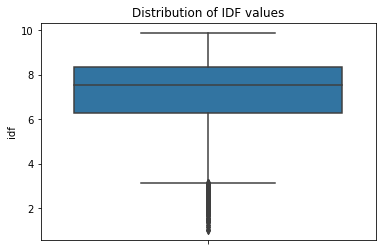

In [15]:
#Boxplot can also give a nice insight into distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=df_idf,y='idf')
plt.plot()
plt.title('Distribution of IDF values')
plt.show()

In [16]:
#We can consider all idf values lying bw. 25th to 75th percentiles
p_start = np.percentile(idfs,[25])
p_end = np.percentile(idfs,[75])

In [17]:
print(np.max(idfs),np.min(idfs))


9.893332470142573 1.0074995326946303


In [19]:
#Taking words lying in interquartile range only
def iqr_words(tf_idf_val,p_start,p_end):
    zipped = zip(tf_idf_val.get_feature_names(),idfs)
    
    words = []
    for word , idf in zipped:
        if idf >= p_start and idf <= p_end:
            words.append(word)
    
    return np.asarray(words)
            

In [65]:
imp_words = iqr_words(tf_idf_val,p_start,p_end)

In [66]:
print(len(imp_words))

5030


In [67]:
print(imp_words.shape)

(5030,)


In [20]:
p_start = 2
p_end = 11
imp_words_2_11 = iqr_words(tf_idf_val,p_start,p_end)

In [21]:
print(imp_words_2_11.shape)

(9975,)


In [22]:
#Make embeddings from tokenizer on essay using imp words only
from tqdm import tqdm

def text_in_iqr(essay_text,imp_words):
    '''
    This method collects words within 25 to 75 percentile
    '''
    result = []
    # For each sentence , keep only words those are in impwords
    for sent in tqdm(essay_text):
        words = sent.split()
        final_sent = ''

        for word in words:
            # Check word exists in idf corpus
            if(word in imp_words):
                final_sent += ' ' + word

        result.append(final_sent)

    return np.asarray(result)

In [70]:
idf_essay_text = text_in_iqr(X_train['essay'],imp_words)

100%|██████████| 87398/87398 [09:34<00:00, 152.02it/s]


In [71]:
idf_essay_text_test = text_in_iqr(X_test['essay'],imp_words)

100%|██████████| 21850/21850 [02:23<00:00, 152.74it/s]


In [72]:
print(idf_essay_text[3])

 virginia beach virginia cluster heights heights obvious nurture storyworks storyworks outcomes


In [73]:
print(len(idf_essay_text))
print(type(idf_essay_text))
print(idf_essay_text[0])

87398
<class 'numpy.ndarray'>
 accommodations ict dyslexia bingo shift puzzle caddies crafts convenient


In [23]:
idf_essay_text_2_11 = text_in_iqr(X_train['essay'],imp_words_2_11)

100%|██████████| 87398/87398 [17:19<00:00, 84.05it/s]


In [24]:
idf_essay_text_test_2_11 = text_in_iqr(X_test['essay'],imp_words_2_11)

100%|██████████| 21850/21850 [04:11<00:00, 86.87it/s] 


In [74]:
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
t  = Tokenizer()
t.fit_on_texts(idf_essay_text)

vocab_size = len(t.word_index)+1
embedding_mat_idf = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_mat_idf[i] = embedding_vector

idf_essay_text = t.texts_to_sequences(idf_essay_text)
idf_essay_text_test = t.texts_to_sequences(idf_essay_text_test)


In [75]:

X_train_essay_idf = pad_sequences(idf_essay_text, maxlen=300)
X_test_essay_idf  = pad_sequences(idf_essay_text_test, maxlen=300)

In [76]:
print(type(X_train_essay_idf))

<class 'numpy.ndarray'>


In [26]:
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do

#print(type(t.word_index)) - dictionary
with open('glove_vectors','rb') as f:
    embeddings = pickle.load(f)


t  = Tokenizer()
t.fit_on_texts(idf_essay_text_2_11)

vocab_size = len(t.word_index)+1
embedding_mat_idf = np.zeros((vocab_size, 300))
for word, i in t.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_mat_idf[i] = embedding_vector

idf_essay_text_2_11 = t.texts_to_sequences(idf_essay_text_2_11)
idf_essay_text_test_2_11 = t.texts_to_sequences(idf_essay_text_test_2_11)


In [27]:
X_train_essay_idf_2_11 = pad_sequences(idf_essay_text_2_11, maxlen=300)
X_test_essay_idf_2_11  = pad_sequences(idf_essay_text_test_2_11, maxlen=300)

In [39]:
# final X_train and X_test 
X_Train_consolidated_2_11 = [X_train_essay_idf_2_11,X_train_school_state,X_train_teacher_prefix,
                        X_train_clean_categories,X_train_clean_subcategories,
                        X_train_project_grade_category,X_train_num_features]



X_Test_consolidated_2_11 = [X_test_essay_idf_2_11,X_test_school_state,X_test_teacher_prefix,
                       X_test_clean_categories,X_test_clean_subcategories,
                       X_test_project_grade_category,X_test_num_features]


In [ ]:
# final X_train and X_test 
X_Train_consolidated = [X_train_essay_idf,X_train_school_state,X_train_teacher_prefix,
                        X_train_clean_categories,X_train_clean_subcategories,
                        X_train_project_grade_category,X_train_num_features]



X_Test_consolidated = [X_test_essay_idf,X_test_school_state,X_test_teacher_prefix,
                       X_test_clean_categories,X_test_clean_subcategories,
                       X_test_project_grade_category,X_test_num_features]








In [40]:
y_train = to_categorical(y_train, 2) 
y_test = to_categorical(y_test, 2)
print(y_train.shape)

(87398, 2)


In [41]:
# Input 1 , essay_input layer

essay_input = Input(shape=(300,), name='essay_input')
embedding_essay = Embedding(input_dim = vocab_size,output_dim = 300,
                            input_length=300 , weights=[embedding_mat_idf])(essay_input)
reg = l2(0.001)
#100 cell LSTM unit
lstm_essay = LSTM(100,recurrent_dropout=0.5,kernel_regularizer=reg,return_sequences=True)(embedding_essay)
flatten_essay = Flatten()(lstm_essay)

# Input 2 , school_state feature

school_state_input = Input(shape=(1,), name='school_state_input')
embedding_school_state = Embedding(input_dim=embedding_school_state_unique_values+1,
                                   output_dim=embedding_school_state_len , input_length=1)(school_state_input)

flatten_school_state = Flatten()(embedding_school_state)

# Input 3 , school_state feature
teacher_prefix_input = Input(shape=(1,), name='teacher_prefix_input')
embedding_teacher_prefix = Embedding(input_dim=embedding_teacher_prefix_unique_value+1,
                                     output_dim=embedding_teacher_prefix_len ,input_length=1)(teacher_prefix_input)

flatten_teacher_prefix = Flatten()(embedding_teacher_prefix)

# Input 4 , clean_categories feature
clean_categories_input = Input(shape=(1,), name='clean_categories_input')
embedding_clean_categories = Embedding(input_dim=embedding_clean_categories_unique_value+2,
                                       output_dim=embedding_clean_categories_len, input_length=1)(clean_categories_input)

flatten_clean_categories = Flatten()(embedding_clean_categories)

# Input 5 , clean_subcategories feature
clean_subcategories_input = Input(shape=(1,), name='clean_subcategories_input')
embedding_clean_subcategories = Embedding(input_dim=401,
                                          output_dim=embedding_clean_subcategories_len, input_length=1)(clean_subcategories_input)

flatten__clean_subcategories = Flatten()(embedding_clean_subcategories)

# Input 6 , project_grade_category feature
project_grade_category_input = Input(shape=(1,), name='project_grade_category_input')
embedding_project_grade_category = Embedding(input_dim=embedding_project_grade_category_unique_value+1,
                                     output_dim=embedding_project_grade_category_len,input_length=1)(project_grade_category_input)

flatten_project_grade_category = Flatten()(embedding_project_grade_category)

# Input 7 , Numerical feature
numeric_features_input = Input(shape=(2,) , name="numerical_features_input")
numeric_features_dense_layer = Dense(128, activation='relu' , kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(numeric_features_input )



flatten_layers = [flatten_essay, flatten_school_state,flatten_teacher_prefix,flatten_clean_categories,
                  flatten__clean_subcategories,flatten_project_grade_category,numeric_features_dense_layer]

concat_layer = concatenate(flatten_layers)

model2_1 = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=l2(0.001))(concat_layer)
model2_1 = Dropout(0.5)(model2_1)
model2_1 = Dense(200,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model2_1)
model2_1 = BatchNormalization()(model2_1)
model2_1 = Dropout(0.5)(model2_1)
model2_1 = Dense(80,activation="relu", kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model2_1)


output = Dense(2, activation='softmax', name='output_layer')(model2_1)


model2_1 = Model(inputs=[essay_input, school_state_input ,teacher_prefix_input,clean_categories_input,
                       clean_subcategories_input ,project_grade_category_input ,numeric_features_input],outputs=[output])


print(model2_1.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 300)     2992800     essay_input[0][0]                
__________________________________________________________________________________________________
school_state_input (InputLayer) [(None, 1)]          0                                            
__________________________________________________________________________________________________
teacher_prefix_input (InputLaye [(None, 1)]          0                                            
______________________________________________________________________________________________

In [ ]:
def helper(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)
    
def custom_auroc(y_true, y_pred):
    return tf.py_function(helper, (y_true, y_pred), tf.double)
    
#need to define a custome function for calculating auroc

model2_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[custom_auroc])


In [80]:
#https://www.gitmemory.com/issue/tensorflow/tensorflow/28799/532818343


checkpoint_object = ModelCheckpoint('Ass2_Model1.h5',monitor="val_custom_auroc",mode="max",save_best_only = True,verbose=2)


earlystop_object = EarlyStopping(monitor = 'val_custom_auroc', mode="max",patience = 2,verbose = 2)

logdir = os.path.join("logs",'Ass2_Model1_visualization')

tensorboard_object = TensorBoard(log_dir=logdir,histogram_freq=1)

callbacks = [checkpoint_object,earlystop_object, tensorboard_object]



In [81]:
history = model2_1.fit(X_Train_consolidated, y_train, 
                     batch_size=256, epochs=10, verbose=1,
                     callbacks=callbacks, validation_data=(X_Test_consolidated,y_test))
                     

Train on 87398 samples, validate on 21850 samples
Epoch 1/10
87296/87398 [============================>.] - ETA: 0s - loss: 1.1354 - custom_auroc: 0.5536
Epoch 00001: val_custom_auroc improved from -inf to 0.61264, saving model to Ass2_Model1.h5
87398/87398 [==============================] - 290s 3ms/sample - loss: 1.1351 - custom_auroc: 0.5536 - val_loss: 0.8161 - val_custom_auroc: 0.6126
Epoch 2/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.7184 - custom_auroc: 0.6179
Epoch 00002: val_custom_auroc improved from 0.61264 to 0.65989, saving model to Ass2_Model1.h5
87398/87398 [==============================] - 301s 3ms/sample - loss: 0.7182 - custom_auroc: 0.6183 - val_loss: 0.6275 - val_custom_auroc: 0.6599
Epoch 3/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.5817 - custom_auroc: 0.6644
Epoch 00003: val_custom_auroc improved from 0.65989 to 0.66057, saving model to Ass2_Model1.h5
87398/87398 [==============================] - 285s 3ms/sample

In [90]:
Ass_2_model1 = np.max(model2_1.history.history['val_custom_auroc'])
print(Ass_2_model1)

0.6653102


In [83]:
%tensorboard --logdir {logdir}

### Model 2_2 with words idf value in range 2 to 11

In [43]:
# Input 1 , essay_input layer

essay_input = Input(shape=(300,), name='essay_input')
embedding_essay = Embedding(input_dim = vocab_size,output_dim = 300,
                            input_length=300 , weights=[embedding_mat_idf])(essay_input)
reg = l2(0.001)
#100 cell LSTM unit
lstm_essay = LSTM(100,recurrent_dropout=0.5,kernel_regularizer=reg,return_sequences=True)(embedding_essay)
flatten_essay = Flatten()(lstm_essay)

# Input 2 , school_state feature

school_state_input = Input(shape=(1,), name='school_state_input')
embedding_school_state = Embedding(input_dim=embedding_school_state_unique_values+1,
                                   output_dim=embedding_school_state_len , input_length=1)(school_state_input)

flatten_school_state = Flatten()(embedding_school_state)

# Input 3 , school_state feature
teacher_prefix_input = Input(shape=(1,), name='teacher_prefix_input')
embedding_teacher_prefix = Embedding(input_dim=embedding_teacher_prefix_unique_value+1,
                                     output_dim=embedding_teacher_prefix_len ,input_length=1)(teacher_prefix_input)

flatten_teacher_prefix = Flatten()(embedding_teacher_prefix)

# Input 4 , clean_categories feature
clean_categories_input = Input(shape=(1,), name='clean_categories_input')
embedding_clean_categories = Embedding(input_dim=embedding_clean_categories_unique_value+2,
                                       output_dim=embedding_clean_categories_len, input_length=1)(clean_categories_input)

flatten_clean_categories = Flatten()(embedding_clean_categories)

# Input 5 , clean_subcategories feature
clean_subcategories_input = Input(shape=(1,), name='clean_subcategories_input')
embedding_clean_subcategories = Embedding(input_dim=401,
                                          output_dim=embedding_clean_subcategories_len, input_length=1)(clean_subcategories_input)

flatten__clean_subcategories = Flatten()(embedding_clean_subcategories)

# Input 6 , project_grade_category feature
project_grade_category_input = Input(shape=(1,), name='project_grade_category_input')
embedding_project_grade_category = Embedding(input_dim=embedding_project_grade_category_unique_value+1,
                                     output_dim=embedding_project_grade_category_len,input_length=1)(project_grade_category_input)

flatten_project_grade_category = Flatten()(embedding_project_grade_category)

# Input 7 , Numerical feature
numeric_features_input = Input(shape=(2,) , name="numerical_features_input")
numeric_features_dense_layer = Dense(128, activation='relu' , kernel_initializer='he_normal',kernel_regularizer=l2(0.001))(numeric_features_input )



flatten_layers = [flatten_essay, flatten_school_state,flatten_teacher_prefix,flatten_clean_categories,
                  flatten__clean_subcategories,flatten_project_grade_category,numeric_features_dense_layer]

concat_layer = concatenate(flatten_layers)

model2_2 = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=l2(0.001))(concat_layer)
model2_2 = Dropout(0.5)(model2_2)
model2_2 = Dense(200,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model2_2)
model2_2 = BatchNormalization()(model2_2)
model2_2 = Dropout(0.5)(model2_2)
model2_2 = Dense(80,activation="relu", kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model2_2)


output = Dense(2, activation='softmax', name='output_layer')(model2_2)


model2_2 = Model(inputs=[essay_input, school_state_input ,teacher_prefix_input,clean_categories_input,
                       clean_subcategories_input ,project_grade_category_input ,numeric_features_input],outputs=[output])


print(model2_2.summary())

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        [(None, 300)]        0                                            
__________________________________________________________________________________________________
embedding_12 (Embedding)        (None, 300, 300)     2992800     essay_input[0][0]                
__________________________________________________________________________________________________
school_state_input (InputLayer) [(None, 1)]          0                                            
__________________________________________________________________________________________________
teacher_prefix_input (InputLaye [(None, 1)]          0                                            
____________________________________________________________________________________________

In [44]:
checkpoint_object = ModelCheckpoint('Ass2_Model2.h5',monitor="val_custom_auroc",mode="max",save_best_only = True,verbose=2)


earlystop_object = EarlyStopping(monitor = 'val_custom_auroc', mode="max",patience = 2,verbose = 2)

logdir = os.path.join("logs",'Ass2_Model2_visualization')
tensorboard_object = TensorBoard(log_dir=logdir,histogram_freq=1)

callbacks = [checkpoint_object,earlystop_object, tensorboard_object]



In [47]:
def helper(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)
    
def custom_auroc(y_true, y_pred):
    return tf.py_function(helper, (y_true, y_pred), tf.double)


model2_2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=[custom_auroc])

history = model2_2.fit(X_Train_consolidated_2_11, y_train, 
                     batch_size=256, epochs=10, verbose=1,
                     callbacks=callbacks, validation_data=(X_Test_consolidated_2_11,y_test))
                     

Train on 87398 samples, validate on 21850 samples
Epoch 1/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.9993 - custom_auroc: 0.6157
Epoch 00001: val_custom_auroc improved from -inf to 0.73834, saving model to Ass2_Model2.h5
87398/87398 [==============================] - 291s 3ms/sample - loss: 0.9990 - custom_auroc: 0.6158 - val_loss: 0.7420 - val_custom_auroc: 0.7383
Epoch 2/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.6066 - custom_auroc: 0.7251
Epoch 00002: val_custom_auroc improved from 0.73834 to 0.74967, saving model to Ass2_Model2.h5
87398/87398 [==============================] - 293s 3ms/sample - loss: 0.6064 - custom_auroc: 0.7256 - val_loss: 0.5219 - val_custom_auroc: 0.7497
Epoch 3/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.4879 - custom_auroc: 0.7550
Epoch 00003: val_custom_auroc improved from 0.74967 to 0.75533, saving model to Ass2_Model2.h5
87398/87398 [==============================] - 296s 3ms/sample

In [48]:
%tensorboard --logdir {logdir}

In [49]:
Ass_2_model2 = np.max(model2_2.history.history['val_custom_auroc'])
print(Ass_2_model2)

0.7592025


### Model-3

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png


- __input_seq_total_text_data__: <br>
<pre>
    . Use text column('essay'), and use the Embedding layer to get word vectors. <br>
    . Use given predefined glove word vectors, don't train any word vectors. <br>
    . Use LSTM that is given above, get the LSTM output and Flatten that output. <br>
    . You are free to preprocess the input text as you needed. <br>
</pre>
- __Other_than_text_data__:<br>
<pre>
    . Convert all your Categorical values to onehot coded and then concatenate all these onehot vectors <br>
    . Neumerical values and use <a href='https://keras.io/getting-started/sequential-model-guide/#sequence-classification-with-1d-convolutions'>CNN1D</a> as shown in above figure. <br>
    . You are free to choose all CNN parameters like kernel sizes, stride.<br>
    
</pre>

In [3]:
data = pd.read_csv('preprocessed_data.csv')
Y = data['project_is_approved'].values
X = data.drop(['project_is_approved'],axis = 1)


# 80-20 split of data with stratification
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,stratify=Y)


len_embeddings = 300
with open('glove_vectors','rb') as f:
    embeddings = pickle.load(f)

t  = Tokenizer()
t.fit_on_texts(X_train['essay'])

#Convert text to sequencese
X_train['essay_tokens'] = t.texts_to_sequences(np.asarray(X_train['essay']))
X_test['essay_tokens'] = t.texts_to_sequences(np.asarray(X_test['essay']))
X_train_essay = pad_sequences(X_train['essay_tokens'].values, maxlen=len_embeddings)
X_test_essay  = pad_sequences(X_test['essay_tokens'].values, maxlen=len_embeddings)


from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 2) 
y_test = to_categorical(y_test, 2)
print(y_train.shape)

max_words = len(t.word_index)+1
embeddings_mat = np.zeros((max_words,300))

#Keep the embeddings for words in our train data
for word, i in t.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embeddings_mat[i] = embedding_vector
        

/home/chitresh/miniconda3/envs/new_env/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/chitresh/miniconda3/envs/new_env/lib/python3.6/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(87398, 2)


In [4]:
max_words = len(embeddings_mat)
print(max_words)

51561


In [5]:
#https://blog.goodaudience.com/introduction-to-1d-convolutional-neural-networks-in-keras-for-time-sequences-3a7ff801a2cf
def one_hot_encoding(X,feature):
    encoder = OneHotEncoder()
    encoder.fit(np.asarray(X[feature]).reshape(-1,1))
    return encoder

encoder = one_hot_encoding(X_train,'school_state')

X_train_school_state_one = encoder.transform(np.asarray(X_train['school_state']).reshape(-1,1))
X_test_school_state_one = encoder.transform(np.asarray(X_test['school_state']).reshape(-1,1))



In [6]:
X_train_school_state_one.shape

(87398, 51)

In [7]:
encoder = one_hot_encoding(X,'teacher_prefix')

X_train_teacher_prefix_one = encoder.transform(np.asarray(X_train['teacher_prefix']).reshape(-1,1))
X_test_teacher_prefix_one = encoder.transform(np.asarray(X_test['teacher_prefix']).reshape(-1,1))

print(X_train_teacher_prefix_one.shape)



(87398, 5)


In [8]:
encoder = one_hot_encoding(X,'clean_categories')

X_train_clean_categories_one = encoder.transform(np.asarray(X_train['clean_categories']).reshape(-1,1))
X_test_clean_categories_one = encoder.transform(np.asarray(X_test['clean_categories']).reshape(-1,1))

print(X_train_clean_categories_one.shape)


(87398, 51)


In [9]:
encoder = one_hot_encoding(X,'clean_subcategories')

X_train_clean_subcategories_one = encoder.transform(np.asarray(X_train['clean_subcategories']).reshape(-1,1))
X_test_clean_subcategories_one = encoder.transform(np.asarray(X_test['clean_subcategories']).reshape(-1,1))

print(X_train_clean_subcategories_one.shape)

(87398, 401)


In [10]:
encoder = one_hot_encoding(X,'project_grade_category')

X_train_project_grade_category_one = encoder.transform(np.asarray(X_train['project_grade_category']).reshape(-1,1))
X_test_project_grade_category_one = encoder.transform(np.asarray(X_test['project_grade_category']).reshape(-1,1))

print(X_train_project_grade_category_one.shape)

(87398, 4)


In [11]:
for i in [X_train_school_state_one,X_train_teacher_prefix_one,X_train_clean_categories_one,X_train_clean_subcategories_one,X_train_project_grade_category_one]:
    print(i.shape)
    

(87398, 51)
(87398, 5)
(87398, 51)
(87398, 401)
(87398, 4)


In [17]:
#Input 2 , other inputs combined
from scipy.sparse import hstack

train_others = [X_train_school_state_one,X_train_teacher_prefix_one,X_train_clean_categories_one,
                X_train_clean_subcategories_one,X_train_project_grade_category_one,X_train_num_features]

X_train_others= hstack(train_others).tocsr()

test_others = [X_test_school_state_one,X_test_teacher_prefix_one,X_test_clean_categories_one,
               X_test_clean_subcategories_one,X_test_project_grade_category_one,X_test_num_features]

X_test_others = hstack(test_others).tocsr()

X_train_others = X_train_others.todense()
X_test_others = X_test_others.todense()

In [18]:
#reshaping
n_size_train = (X_train_others.shape[0],X_train_others.shape[1],1)
X_train_reshaped = np.resize(X_train_others,n_size_train)

n_size_test = (X_test_others.shape[0],X_test_others.shape[1],1)
X_test_reshaped = np.resize(X_test_others,n_size_test)

print(X_train_reshaped.shape)

X_Train_consolidated = [X_train_essay,X_train_reshaped]
                        
X_Test_consolidated = [X_test_essay,X_test_reshaped]

for i in X_Train_consolidated:
    print(type(i))
for i in X_Train_consolidated:
    print(type(i))

(87398, 514, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [19]:
print("CNN1 input shape of train data: {} and test data: {} .".format(n_size_train,n_size_test))

CNN1 input shape of train data: (87398, 514, 1) and test data: (21850, 514, 1) .


In [20]:
# Input 1 , essay_input layer

input1 = Input(shape=(300,), name='essay_input')
embedding_essay_3 = Embedding(input_dim = max_words,output_dim = 300,
                            input_length=300 , weights=[embeddings_mat])(input1)

reg = l2(0.001)

#100 cell LSTM unit
lstm_essay_3 = LSTM(100,recurrent_dropout=0.5,kernel_regularizer=l2(0.001),return_sequences=True)(embedding_essay_3)
flatten_essay_3 = Flatten()(lstm_essay_3)


# input 2
input2 = Input(shape=(514,1))
cnn_input = Conv1D(filters=64,kernel_size=3,strides=1)(input2)
cnn_input = Conv1D(filters=64,kernel_size=3,strides=1)(cnn_input)
cnn_input_flatten = Flatten()(cnn_input)

In [21]:
concat_layer = concatenate([flatten_essay_3, cnn_input_flatten])

model_3 = Dense(300, activation="relu", kernel_initializer="he_normal" ,kernel_regularizer=l2(0.001))(concat_layer)
model_3 = Dropout(0.5)(model_3)
model_3 = Dense(200,activation="relu",kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model_3)
model_3 = BatchNormalization()(model_3)
model_3 = Dropout(0.5)(model_3)
model_3 = Dense(80,activation="relu", kernel_initializer="glorot_normal" ,kernel_regularizer=l2(0.001))(model_3)


output = Dense(2, activation='softmax', name='output_layer')(model_3)


In [22]:
model_3 = Model(inputs = [input1,input2],outputs=[output])
print(model_3.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
essay_input (InputLayer)        [(None, 300)]        0                                            
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 514, 1)]     0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 300, 300)     15468300    essay_input[0][0]                
__________________________________________________________________________________________________
conv1d (Conv1D)                 (None, 512, 64)      256         input_1[0][0]                    
______________________________________________________________________________________________

In [23]:
def helper(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)
    
def custom_auroc(y_true, y_pred):
    return tf.py_function(helper, (y_true, y_pred), tf.double)
    

model_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=[custom_auroc])

In [24]:
#https://www.gitmemory.com/issue/tensorflow/tensorflow/28799/532818343


checkpoint_object = ModelCheckpoint('Ass3_Model1.h5',monitor="val_custom_auroc",mode="max",save_best_only = True,verbose=2)


earlystop_object = EarlyStopping(monitor = 'val_custom_auroc', mode="max",patience = 4,verbose = 2)

logdir = os.path.join("logs",'Ass3_Model1_visualization')
tensorboard_object = TensorBoard(log_dir=logdir,histogram_freq=1)

callbacks = [checkpoint_object,earlystop_object, tensorboard_object]


In [25]:
history = model_3.fit(X_Train_consolidated, y_train, 
                     batch_size=256, epochs=10, verbose=1,
                     callbacks=callbacks, validation_data=(X_Test_consolidated,y_test))

Train on 87398 samples, validate on 21850 samples
Epoch 1/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.9620 - custom_auroc: 0.5905
Epoch 00001: val_custom_auroc improved from -inf to 0.71507, saving model to Ass3_Model1.h5
87398/87398 [==============================] - 639s 7ms/sample - loss: 0.9617 - custom_auroc: 0.5905 - val_loss: 0.7234 - val_custom_auroc: 0.7151
Epoch 2/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.6228 - custom_auroc: 0.7304
Epoch 00002: val_custom_auroc improved from 0.71507 to 0.74726, saving model to Ass3_Model1.h5
87398/87398 [==============================] - 631s 7ms/sample - loss: 0.6226 - custom_auroc: 0.7305 - val_loss: 0.5730 - val_custom_auroc: 0.7473
Epoch 3/10
87296/87398 [============================>.] - ETA: 0s - loss: 0.5084 - custom_auroc: 0.7737
Epoch 00003: val_custom_auroc improved from 0.74726 to 0.75322, saving model to Ass3_Model1.h5
87398/87398 [==============================] - 621s 7ms/sample

In [26]:
Ass_3 = np.max(model_3.history.history['val_custom_auroc'])

In [27]:
%tensorboard --logdir {logdir}

# Conclusion

In [51]:
# Please compare all your models using Prettytable library
#http://zetcode.com/python/prettytable/
from prettytable import PrettyTable


x = PrettyTable()
x.field_names = ["Features","Model Name", "Model Specifications","Custom AUC"]
x.add_row(["Assignment 1 ", "Model 1", "3 dense layers with ReLU activation \n Adam Optimizer default learning rate \n Text from Glove",'0.75184745'])
x.add_row(["Assignment 2 ",  "Model 2","3 dense layers with ReLU activation \n Adam Optimizer default learning rate \n Text with IDF",'0.7592025'])
x.add_row(["Assignment 3 ",  "Model 3","3 dense layers with ReLU activation \n Adam Optimizer default learning rate \n Text from Glove and Conv1D for other features" ,'0.75321674'])

print(x)

+---------------+------------+------------------------------------------------+------------+
|    Features   | Model Name |              Model Specifications              | Custom AUC |
+---------------+------------+------------------------------------------------+------------+
| Assignment 1  |  Model 1   |      3 dense layers with ReLU activation       | 0.75184745 |
|               |            |      Adam Optimizer default learning rate      |            |
|               |            |                 Text from Glove                |            |
| Assignment 2  |  Model 2   |      3 dense layers with ReLU activation       | 0.7592025  |
|               |            |      Adam Optimizer default learning rate      |            |
|               |            |                  Text with IDF                 |            |
| Assignment 3  |  Model 3   |      3 dense layers with ReLU activation       | 0.75321674 |
|               |            |      Adam Optimizer default learning ra